# Using Pandas to manage tabular data

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simple example

In [13]:
data = pd.DataFrame(data = np.arange(24).reshape(6,4),
                    columns = list("ABCD") )
data

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23


In [14]:
data.A # Column "A"

0     0
1     4
2     8
3    12
4    16
5    20
Name: A, dtype: int64

In [15]:
data.loc[4]

A    16
B    17
C    18
D    19
Name: 4, dtype: int64

In [16]:
data["E"] = data.A**2
data

,A,B,C,D,E
0,0,1,2,3,0
1,4,5,6,7,16
2,8,9,10,11,64
3,12,13,14,15,144
4,16,17,18,19,256
5,20,21,22,23,400


In [19]:
data.drop("B", axis = 1, inplace = True)
data

,A,C,D,E
0,0,2,3,0
1,4,6,7,16
2,8,10,11,64
3,12,14,15,144
4,16,18,19,256
5,20,22,23,400


In [21]:
data.at[10, "K"] = 5
data

,A,C,D,E,K
0,0.0,2.0,3.0,0.0,NaN
1,4.0,6.0,7.0,16.0,NaN
2,8.0,10.0,11.0,64.0,NaN
3,12.0,14.0,15.0,144.0,NaN
4,16.0,18.0,19.0,256.0,NaN
5,20.0,22.0,23.0,400.0,NaN
10,NaN,NaN,NaN,NaN,5.0


In [27]:
data.to_csv("data/simple.csv", index = True)
data2 = pd.read_csv("data/simple.csv", index_col = 0)
data2

,A,C,D,E,K
0,0.0,2.0,3.0,0.0,NaN
1,4.0,6.0,7.0,16.0,NaN
2,8.0,10.0,11.0,64.0,NaN
3,12.0,14.0,15.0,144.0,NaN
4,16.0,18.0,19.0,256.0,NaN
5,20.0,22.0,23.0,400.0,NaN
10,NaN,NaN,NaN,NaN,5.0


## A more complex example with multiple files

In [28]:
import os

In [29]:
# CREATE MULTIPLE FILES WITH THE SAME STRUCTURE
for i in range(10): # Create 10 files !
    data = pd.DataFrame(data = np.random.rand(24).reshape(6,4),
                    columns = list("ABCD") )
    data.to_csv("data/data_{0}.csv".format(i), index = True)

In [47]:
#NOW READ THEM, DO SOMETHING 
files = sorted([f for f in os.listdir("data/") if f.endswith(".csv") and f.startswith("data_")])
dataframes = [pd.read_csv("data/" + f, index_col = 0) for f in files]
for i in range(len(files)):
    data = dataframes[i]
    data.drop("C", axis = 1, inplace = True)
    data.to_csv("data/data_mod_{0}.csv".format(i))
    

In [45]:
data.groupby(data.A > .5).get_group(True)

,A,B,C,D
1,0.714887,0.434745,0.050486,0.547402
2,0.748315,0.422030,0.384493,0.112593
3,0.980475,0.890726,0.758435,0.985632
5,0.785047,0.096159,0.128619,0.946783


In [50]:
"{0:.2f} is {1}".format(1,"red")

'1.00 is red'

In [58]:
pd.read_csv("data/data_0.csv", index_col = 0).drop(4, axis = 0).values

array([[0.67056333, 0.95333114, 0.33666474, 0.96285694],
       [0.13654824, 0.95332971, 0.69652799, 0.30567199],
       [0.67796096, 0.51677258, 0.42157957, 0.19664569],
       [0.10671407, 0.60566912, 0.01930071, 0.01863125],
       [0.46085866, 0.45809968, 0.11217385, 0.64257353]])

In [65]:
data2 = data.copy()
data2.index = ["aaa", "ccc", "zzzz", "uu", "ww", "r"]


,A,B,D
aaa,0.378965,0.091697,0.961272
ccc,0.714887,0.434745,0.547402
zzzz,0.748315,0.422030,0.112593
uu,0.980475,0.890726,0.985632
ww,0.420830,0.585762,0.382037
r,0.785047,0.096159,0.946783


In [66]:
data2.loc["ccc"]

A    0.714887
B    0.434745
D    0.547402
Name: ccc, dtype: float64

In [67]:
data2.iloc[1]

A    0.714887
B    0.434745
D    0.547402
Name: ccc, dtype: float64

<IPython.core.display.Javascript object>


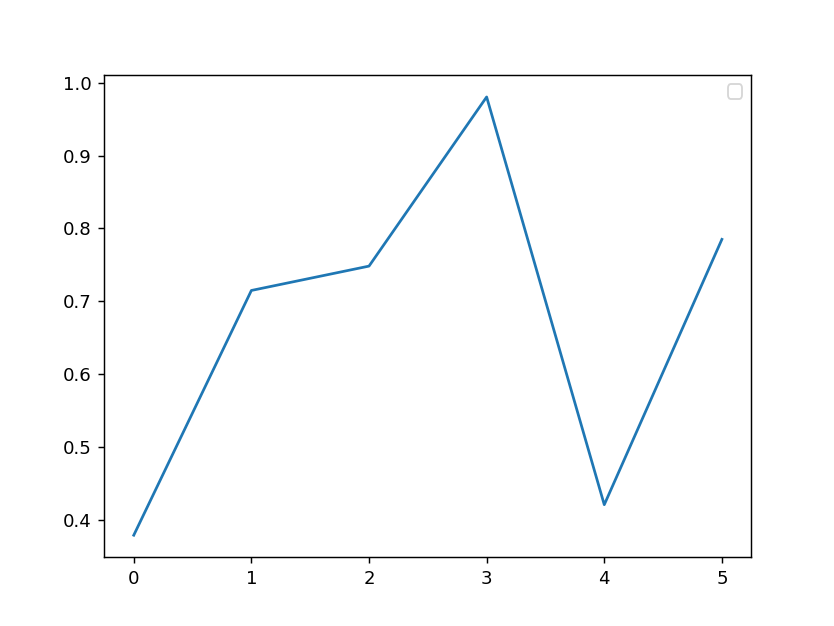

No handles with labels found to put in legend.


In [70]:
plt.figure()
plt.plot(data.A)
plt.legend()